### Part 1: Enrollment over the years

In the original bar chart displaying the enrollment in UH Manoa and Leeward CC, we are unable to see a trend, as the charts only compare the enrollments of semesters two years apart at two different institutions. Because of this we cant see general trend of enrollment throughout the year, and see if there has infact been a general downward trend or if its a sudden, random dip due to Covid-19, or other outside influence.
In my opinion, a line chart charting the enrollment over the 10 years would do a better job.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Starting with tidying the .csv file to only contain the data we want from 2012-2022 as well as the column information we want (year, school, hawaiian legacy, enrollment numbers).

In [3]:
enrollment = pd.read_csv("Enrollment_zip.csv")

enrollment_clean = enrollment[["SEMESTER", "IRO_INSTITUTION_DESCL", "HAWAIIAN_LEGACY", "ENROLLMENT"]]
enrollment_clean["SEMESTER"] = enrollment_clean["SEMESTER"].replace("Fall ", "", regex=True)

enrollment_clean.rename(columns= {"IRO_INSTITUTION_DESCL" : "CAMPUS"}, inplace=True)

display(enrollment_clean)

li = ["2012", "2013", "2014", "2015", "2016", "2017", "2018", "2019", "2020", "2021", "2022"]

enrollment_total = enrollment_clean[enrollment_clean.SEMESTER.isin(li)]
display(enrollment_total)

C:\Users\mercy\AppData\Local\Temp\ipykernel_2376\3400903389.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  enrollment_clean["SEMESTER"] = enrollment_clean["SEMESTER"].replace("Fall ", "", regex=True)
C:\Users\mercy\AppData\Local\Temp\ipykernel_2376\3400903389.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  enrollment_clean.rename(columns= {"IRO_INSTITUTION_DESCL" : "CAMPUS"}, inplace=True)


,SEMESTER,CAMPUS,HAWAIIAN_LEGACY,ENROLLMENT
0,2012,Honolulu Community College,NaN,24
1,2012,Kapi`olani Community College,NaN,5
2,2012,Windward Community College,NaN,205
3,2012,Leeward Community College,NaN,517
4,2012,University of Hawai`i at Manoa,NaN,37
...,...,...,...,...
159263,2022,University of Hawai`i at Manoa,HAWAIIAN,1
159264,2022,Leeward Community College,HAWAIIAN,1
159265,2022,University of Hawai`i Maui College,NaN,1
159266,2022,University of Hawai`i at Manoa,NaN,1


,SEMESTER,CAMPUS,HAWAIIAN_LEGACY,ENROLLMENT
0,2012,Honolulu Community College,NaN,24
1,2012,Kapi`olani Community College,NaN,5
2,2012,Windward Community College,NaN,205
3,2012,Leeward Community College,NaN,517
4,2012,University of Hawai`i at Manoa,NaN,37
...,...,...,...,...
159263,2022,University of Hawai`i at Manoa,HAWAIIAN,1
159264,2022,Leeward Community College,HAWAIIAN,1
159265,2022,University of Hawai`i Maui College,NaN,1
159266,2022,University of Hawai`i at Manoa,NaN,1


For this section, we dont care to differentiate the Hawaiian legacy students from non_Hawaiian legacy, so we can just go ahead and group the data by campus, and year, summing the enrollment numbers together within each catagory.

In [13]:
UH_campuses = enrollment_total.CAMPUS.unique()

enrollment_numbers = enrollment_total.groupby(["CAMPUS", "SEMESTER"]).sum()

display(enrollment_numbers)

Manoa_enrollment = enrollment_numbers.loc[("University of Hawai`i at Manoa")]
Leeward_enrollment = enrollment_numbers.loc[("Leeward Community College")]


ENROLLMENT
CAMPUS                     SEMESTER            
Hawai`i Community College  2012            3663
                           2013            3406
                           2014            3186
                           2015            3087
                           2016            2956
...                                         ...
Windward Community College 2018            2460
                           2019            2520
                           2020            2299
                           2021            2386
                           2022            2384

[110 rows x 1 columns]

Now we can graph the data we have, by going using a for loop through college names, we are able to plot all of the campuses enrollments easily. As we can see however, this makes a very messy graph, so we can simply focus on who colleges, University of Hawaii at Manoa, and Leeward Community College.

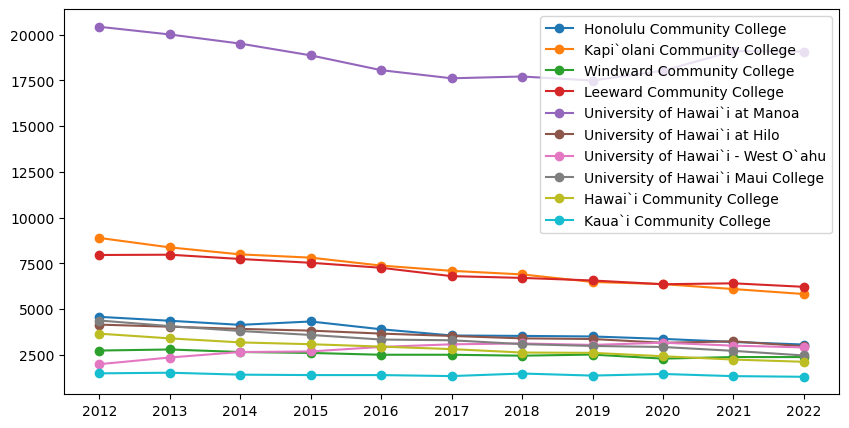

In [16]:
Manoa_enrollment = enrollment_numbers.loc[("University of Hawai`i at Manoa")]
Leeward_enrollment = enrollment_numbers.loc[("Leeward Community College")]

plt.figure(figsize=(10,5))

for campus in UH_campuses:
    plt.plot(enrollment_numbers.loc[(campus)].index, enrollment_numbers.loc[(campus)]["ENROLLMENT"], '-o', label = (campus))

plt.legend()

Text(0.5, 0, 'Year')

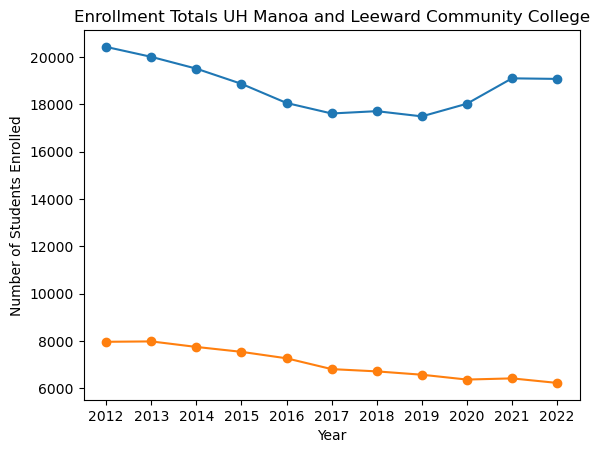

In [6]:

plt.plot(Manoa_enrollment.index, Manoa_enrollment["ENROLLMENT"], '-o')
plt.plot(Leeward_enrollment.index, Leeward_enrollment["ENROLLMENT"], '-o')

plt.title("Enrollment Totals UH Manoa and Leeward Community College")
plt.ylabel("Number of Students Enrolled")
plt.xlabel("Year")

While this graph works at depicting the general trends of enrollment at UH Manoa and Leeward community college, it's difficult to compare the trends in enrollment in more detail because of the large difference in numbers. To solve this, we can graph them on separate axis, taking note of the different y-axis scale.

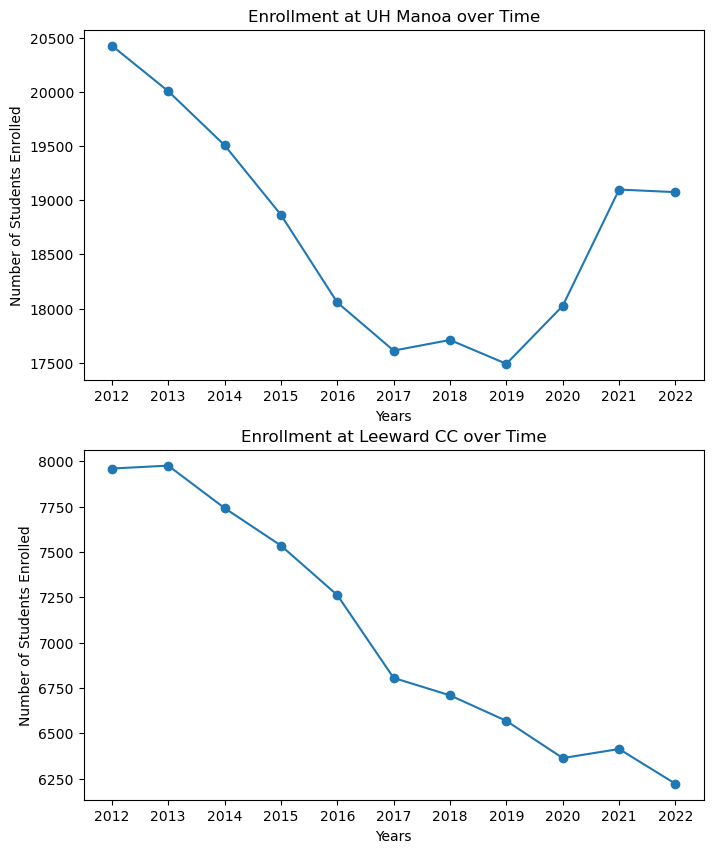

In [7]:
plt.figure(figsize=(8,10))
plt.subplot(2, 1, 1)
plt.plot(Manoa_enrollment.index, Manoa_enrollment["ENROLLMENT"], '-o')
plt.title("Enrollment at UH Manoa over Time")
plt.xlabel("Years")
plt.ylabel("Number of Students Enrolled")

plt.subplot(2, 1, 2)
plt.title("Enrollment at Leeward CC over Time")
plt.xlabel("Years")
plt.ylabel("Number of Students Enrolled")

plt.plot(Leeward_enrollment.index, Leeward_enrollment["ENROLLMENT"], '-o')

### Part 2: Enrollment of Hawaiian Students

Once again wrangling data by selecting the columns we want to use, we then replace every instance of the the word "HAWAIIAN" in the column "HAWAIIAN_LEGACY" with 1. In doing this, we can multiply the value of enrollments assigned to that row, and add them together giving us the number of Hawaiian Legacy Enrollees by a campus and year by doing groupby once more.

In [18]:
hawaiian_legacy = enrollment_total[["SEMESTER", "CAMPUS", "HAWAIIAN_LEGACY", "ENROLLMENT"]]

hawaiian_legacy["HAWAIIAN_LEGACY"] = hawaiian_legacy["HAWAIIAN_LEGACY"].map({'HAWAIIAN':1})

hawaiian_legacy["HAWAIIAN_ENROLLEES"] = hawaiian_legacy["HAWAIIAN_LEGACY"]*hawaiian_legacy["ENROLLMENT"]

hawaiian_legacy_indexed = hawaiian_legacy.groupby(["CAMPUS", "SEMESTER"]).sum()
display(hawaiian_legacy_indexed)

uh_hawaiian = hawaiian_legacy_indexed.loc["University of Hawai`i at Manoa"]
leeward_cc = hawaiian_legacy_indexed.loc["Leeward Community College"]
windward_cc = hawaiian_legacy_indexed.loc["Windward Community College"]

HAWAIIAN_LEGACY  ENROLLMENT  \
CAMPUS                     SEMESTER                                
Hawai`i Community College  2012                152.0        3663   
                           2013                142.0        3406   
                           2014                137.0        3186   
                           2015                123.0        3087   
                           2016                123.0        2956   
...                                              ...         ...   
Windward Community College 2018                108.0        2460   
                           2019                453.0        2520   
                           2020                282.0        2299   
                           2021                545.0        2386   
                           2022                567.0        2384   

                                     HAWAIIAN_ENROLLEES  
CAMPUS                     SEMESTER                      
Hawai`i Community College  2012                  1644.0  
                           2013                  1472.0  
                           2014                  1413.0  
                           2015                  1359.0  
                           2016                  1341.0  
...                                                 ...  
Windward Community College 2018                  1033.0  
                           2019                  1152.0  
                           2020                  1056.0  
                           2021                  1130.0  
                           2022                  1105.0  

[110 rows x 3 columns]

Getting the percents from number of Hawaiian enrollees and the total number of enrollees...

In [19]:
uh_percent = uh_hawaiian["HAWAIIAN_ENROLLEES"]/uh_hawaiian["ENROLLMENT"] * 100
windward_percent = windward_cc["HAWAIIAN_ENROLLEES"]/windward_cc["ENROLLMENT"] * 100

The first way that comes to mind to visualize the percent Hawaiian legacy vs not is in a stacked bar graph.

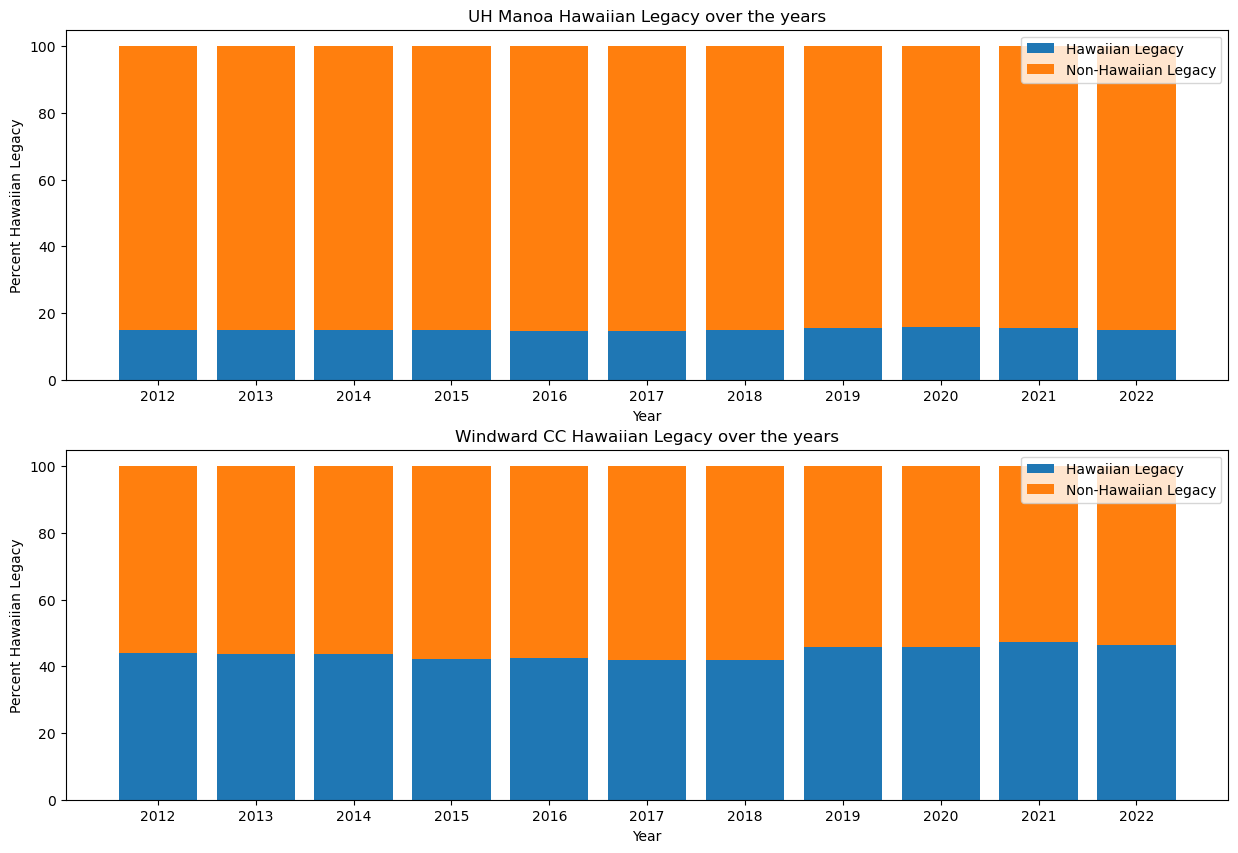

In [20]:
plt.figure(figsize = (15, 10))
plt.subplot(2,1,1)

plt.xlabel("Year")
plt.ylabel("Percent Hawaiian Legacy")
plt.title("UH Manoa Hawaiian Legacy over the years")

plt.bar(uh_hawaiian.index, uh_percent, label = "Hawaiian Legacy")
plt.bar(uh_hawaiian.index, 100 - uh_percent, bottom = uh_percent, label= "Non-Hawaiian Legacy")
plt.legend()


plt.subplot(2,1,2)
plt.xlabel("Year")
plt.ylabel("Percent Hawaiian Legacy")
plt.title("Windward CC Hawaiian Legacy over the years")
plt.bar(windward_cc.index, windward_percent, label = "Hawaiian Legacy")
plt.bar(windward_cc.index, 100 - windward_percent, bottom = windward_percent, label= "Non-Hawaiian Legacy")
plt.legend()

In doing this, we can easily see the comparison of hawaiian and non hawaiian legacy through the years at either college, however with the large blocks of color, it can be alot to look at. So another way to observe the changes, and better compare the percent changes between the two schools is through another line graph, this time with the percent of Hawaiian Legacy enrolles on the y axis, and the years on the x axis

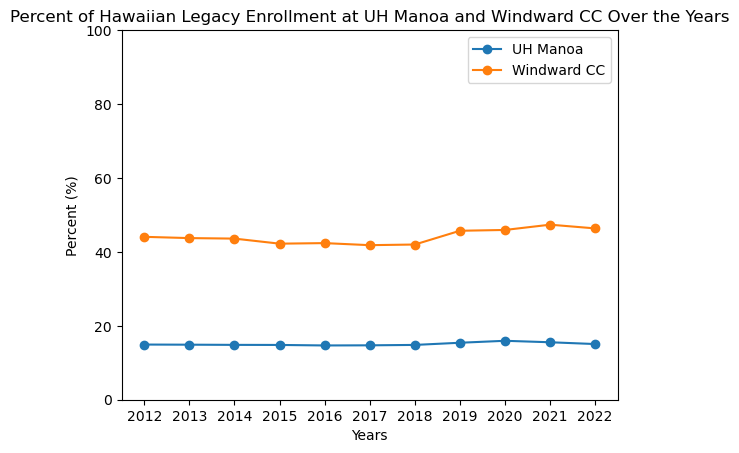

In [21]:
plt.title("Percent of Hawaiian Legacy Enrollment at UH Manoa and Windward CC Over the Years")
plt.ylabel("Percent (%)")
plt.xlabel("Years")
plt.plot(uh_hawaiian.index, uh_percent, 'o-', label = "UH Manoa")
plt.plot(windward_cc.index, windward_percent, 'o-', label = "Windward CC")
plt.ylim(0, 100)
plt.legend()